In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import random
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [4]:
# Load the datasets
pokemon = pd.read_csv("pokemon_data.csv")  # Pokemon Dataset
combats = pd.read_csv("combats.csv")  # Combats Dataset
test = pd.read_csv("test.csv") # Test Dataset
print(pokemon.isnull().sum())
print(pokemon[pokemon['Name'].isnull()])
pokemon.loc[62, 'Name'] = 'Primeape'

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting    NaN  65     105       60       60       70     95   

    Generation  Legendary  
62           1      False  


In [5]:
pokemon.rename(columns={'#':'id'},inplace=True)
#filling NA with None
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')
# Dropping irrelevant features
pokemon.drop(columns = ['Generation', 'Legendary'])

,id,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80
4,5,Charmander,Fire,None,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80


In [6]:
# Creating class labels
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1

print(combats.head())

   First_pokemon  Second_pokemon  Winner
0            266             298       1
1            702             701       1
2            191             668       1
3            237             683       1
4            151             231       0



 HP  :




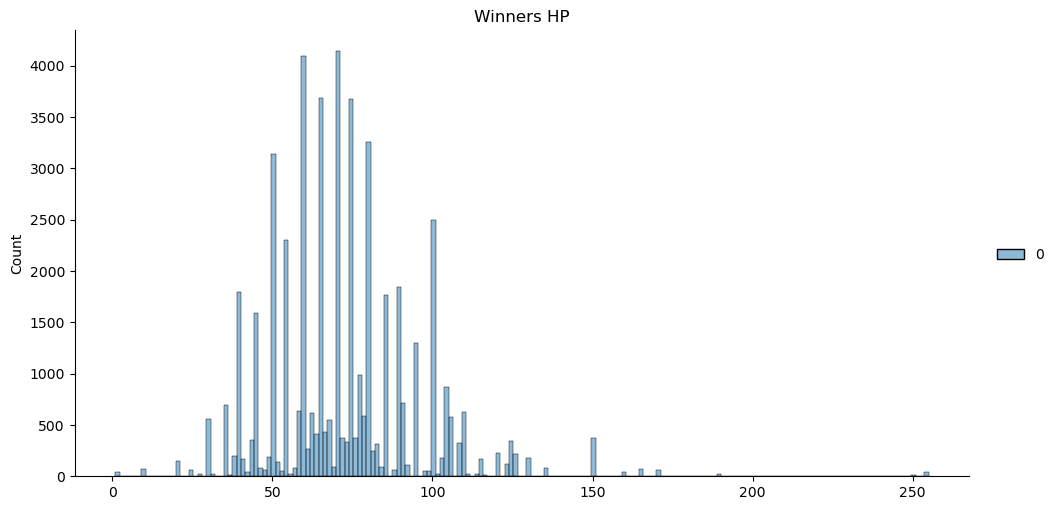

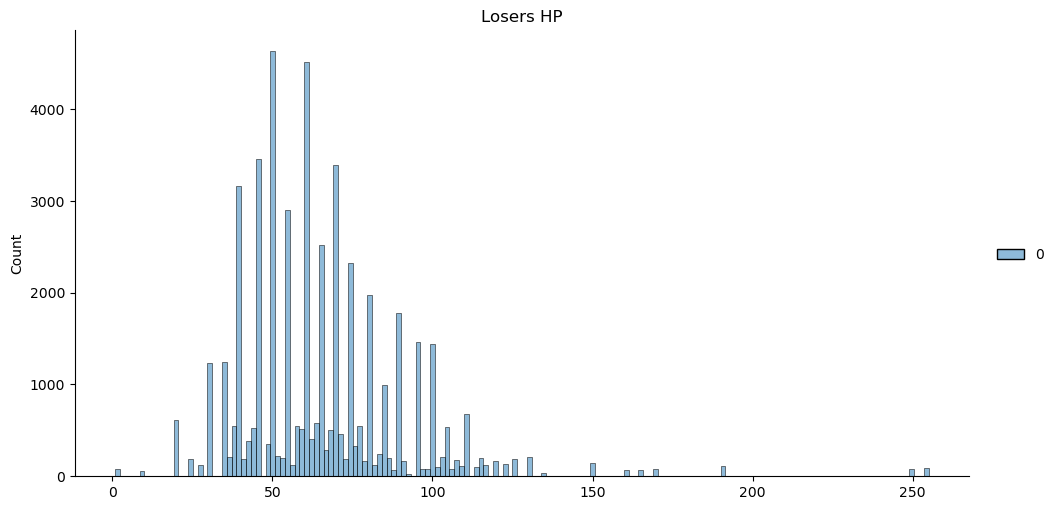

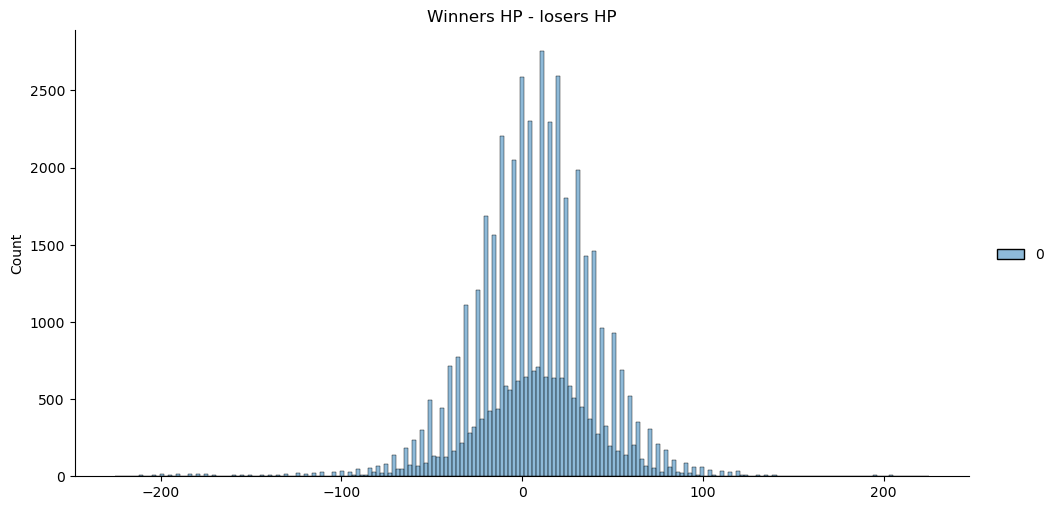

Average winners HP - losers HP :  0    6.8989
dtype: float64


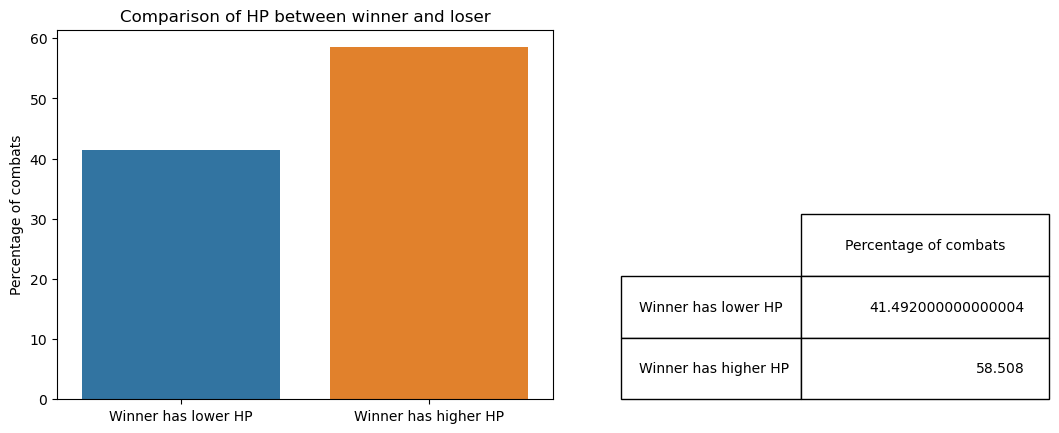


-----------------------------------------------------------------------------------------------------------------------------------------------


 Attack  :




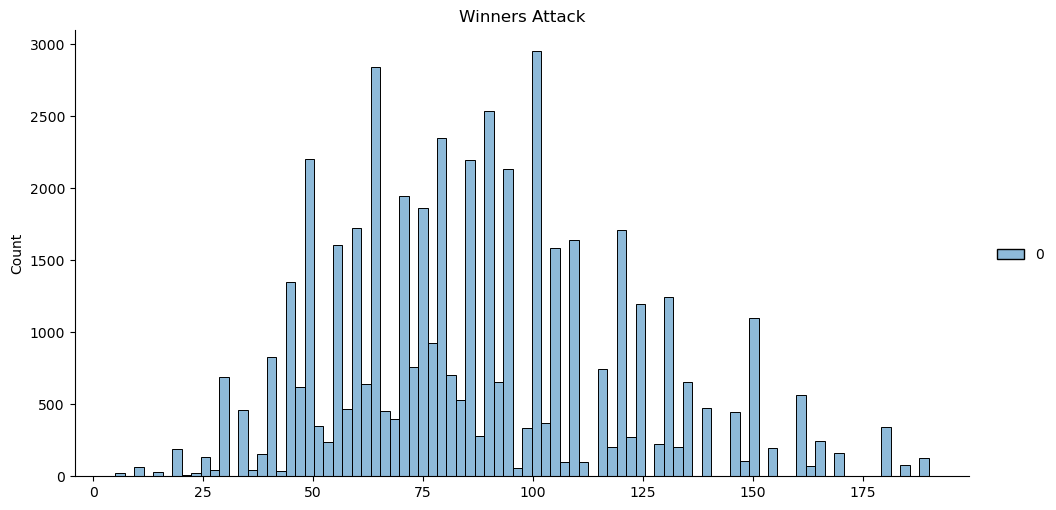

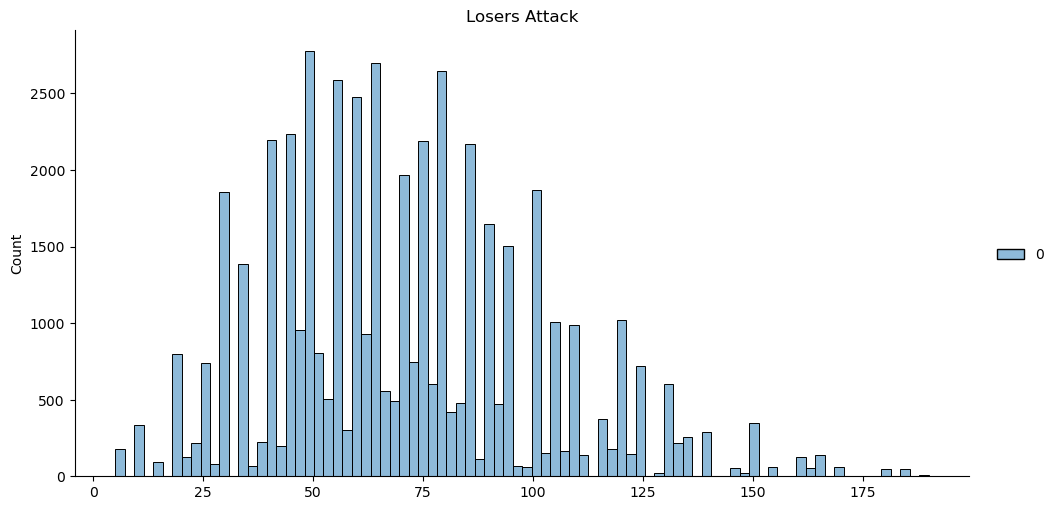

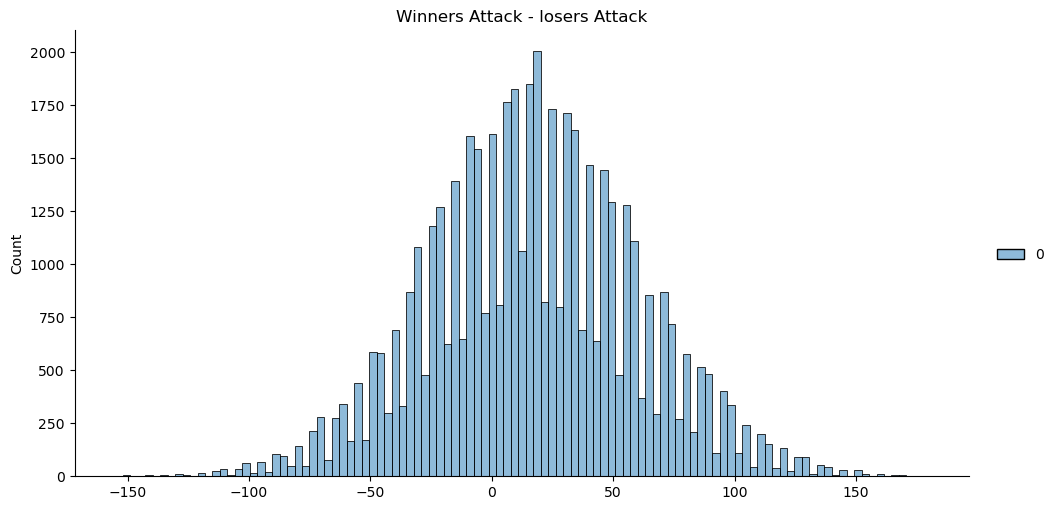

Average winners Attack - losers Attack :  0    16.67226
dtype: float64


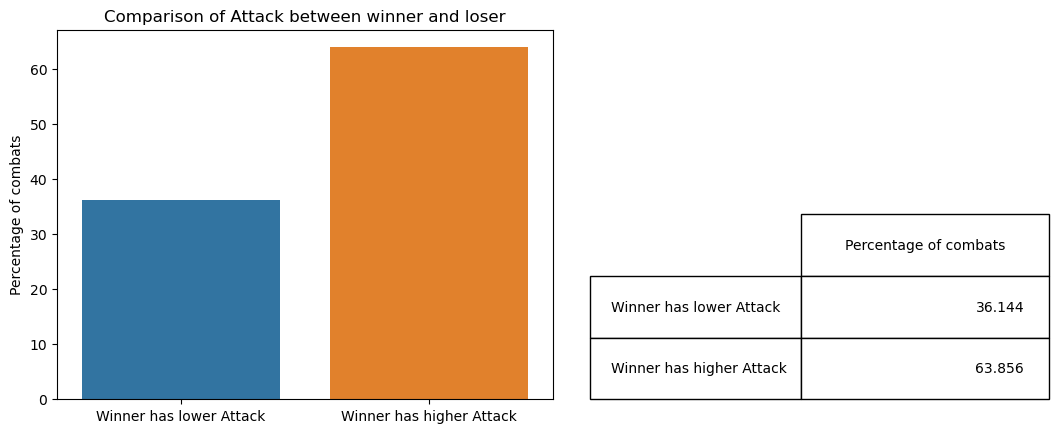


-----------------------------------------------------------------------------------------------------------------------------------------------


 Defense  :




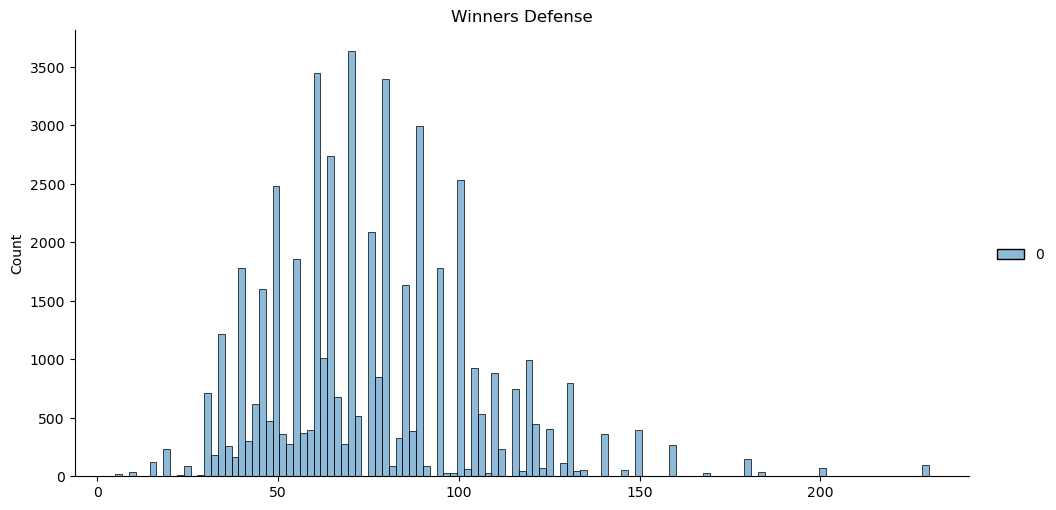

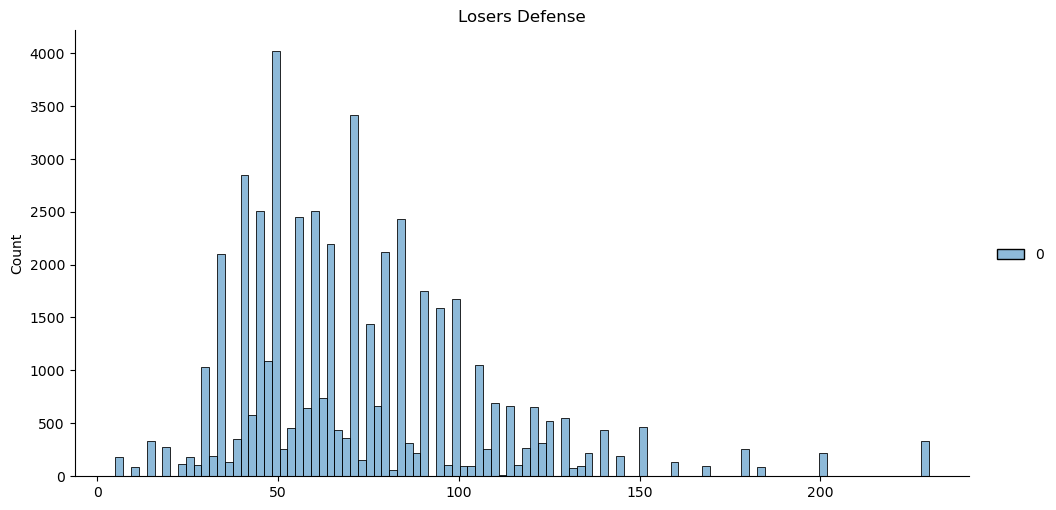

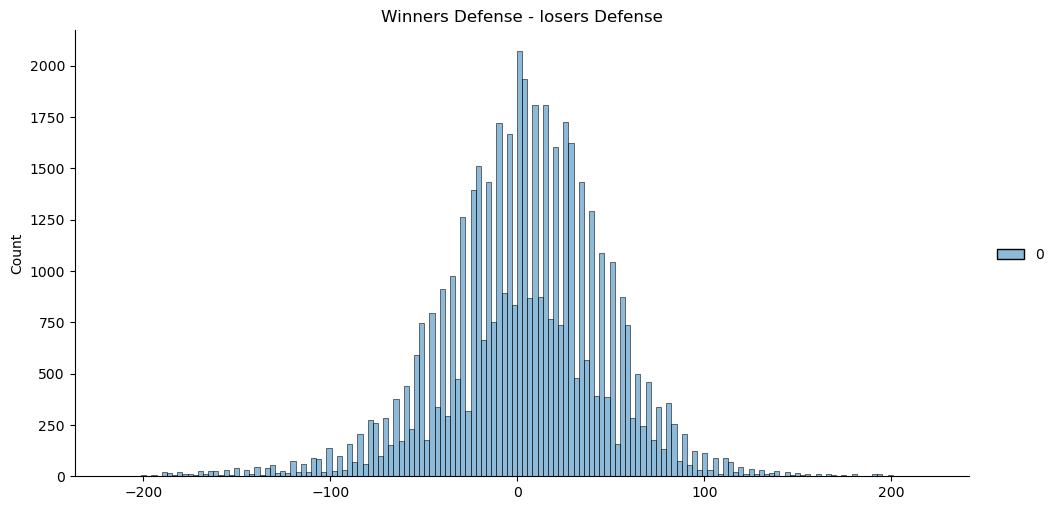

Average winners Defense - losers Defense :  0    3.5387
dtype: float64


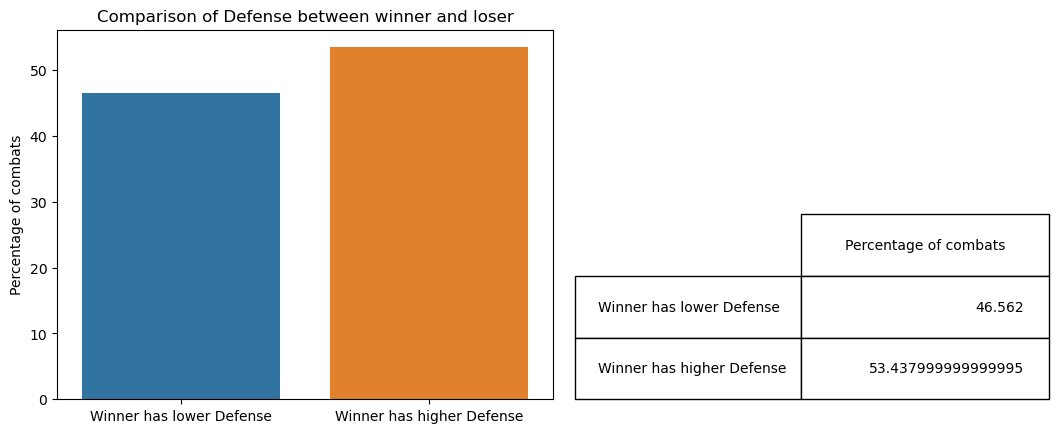


-----------------------------------------------------------------------------------------------------------------------------------------------


 Sp. Atk  :




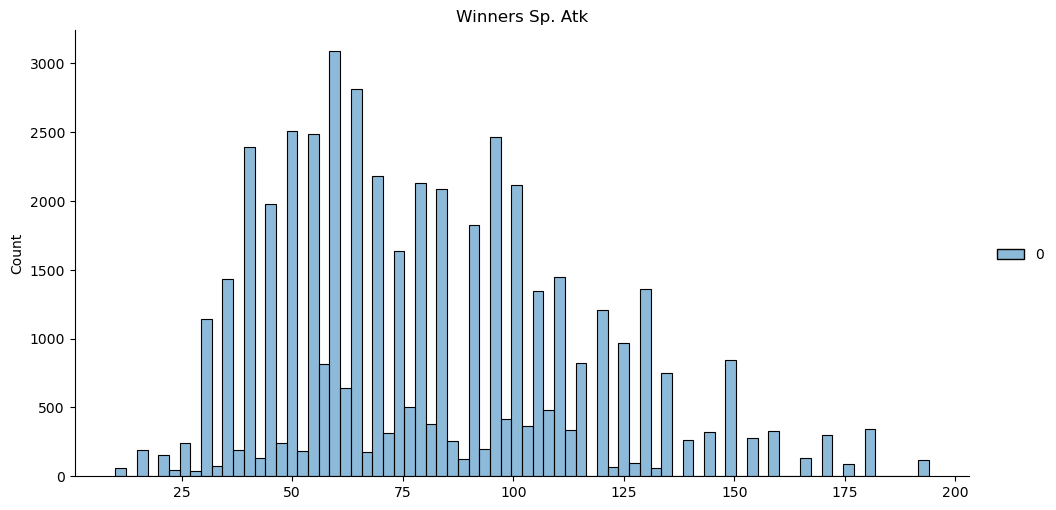

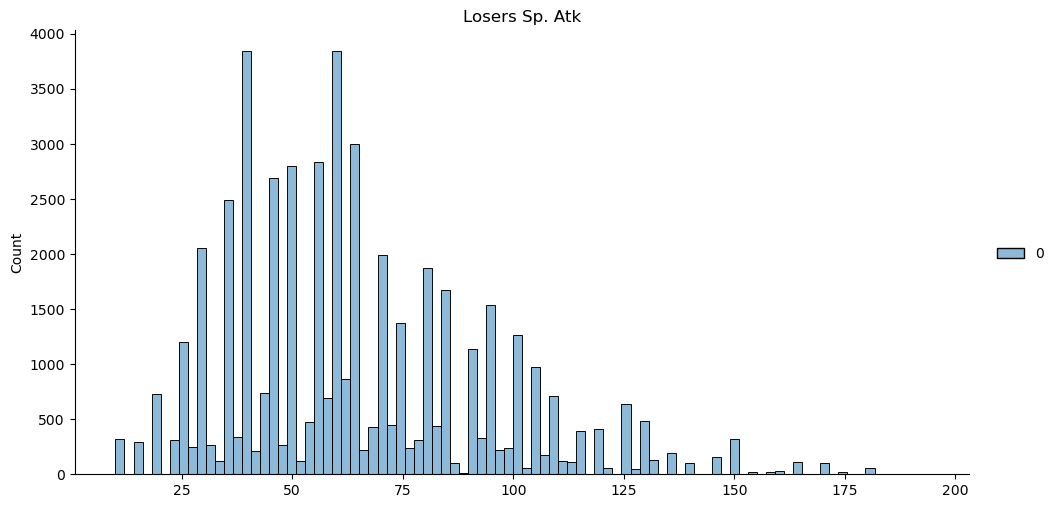

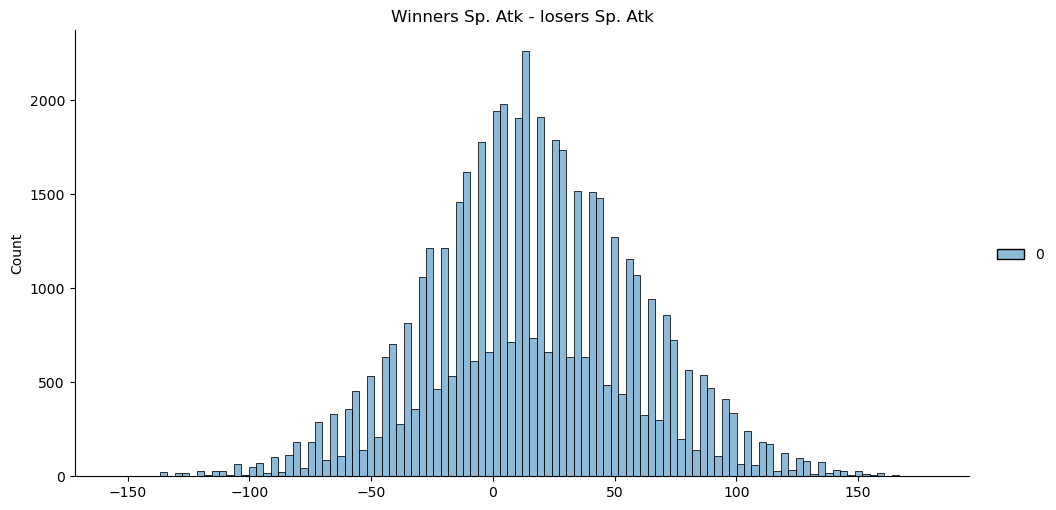

Average winners Sp. Atk - losers Sp. Atk :  0    16.07432
dtype: float64


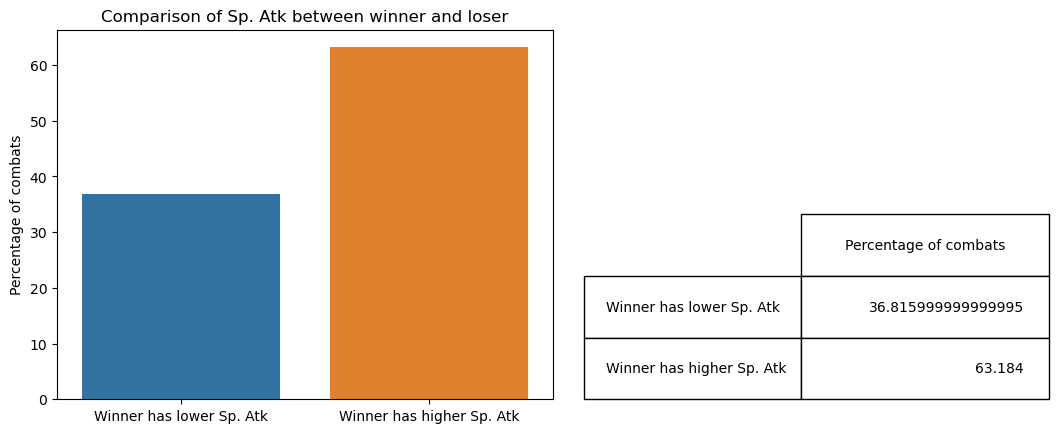


-----------------------------------------------------------------------------------------------------------------------------------------------


 Sp. Def  :




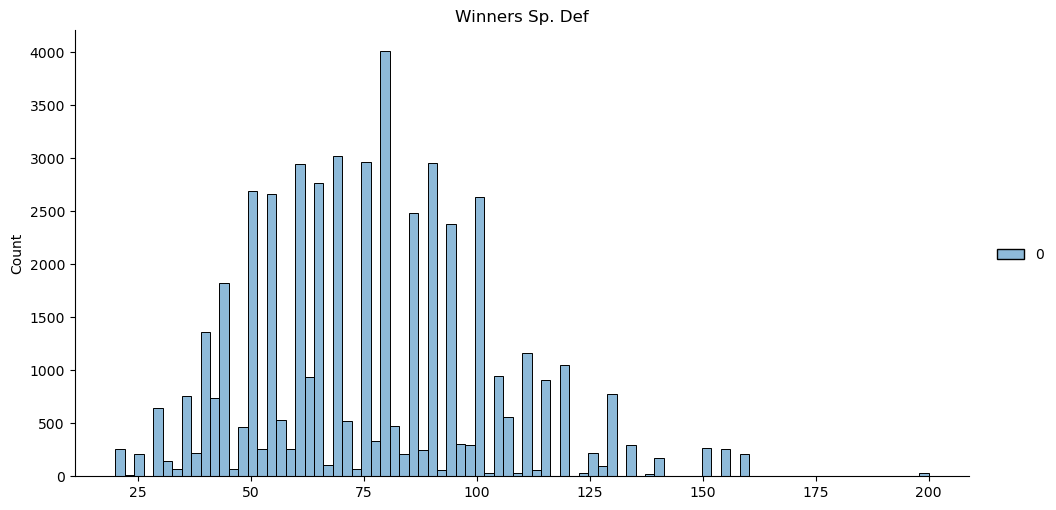

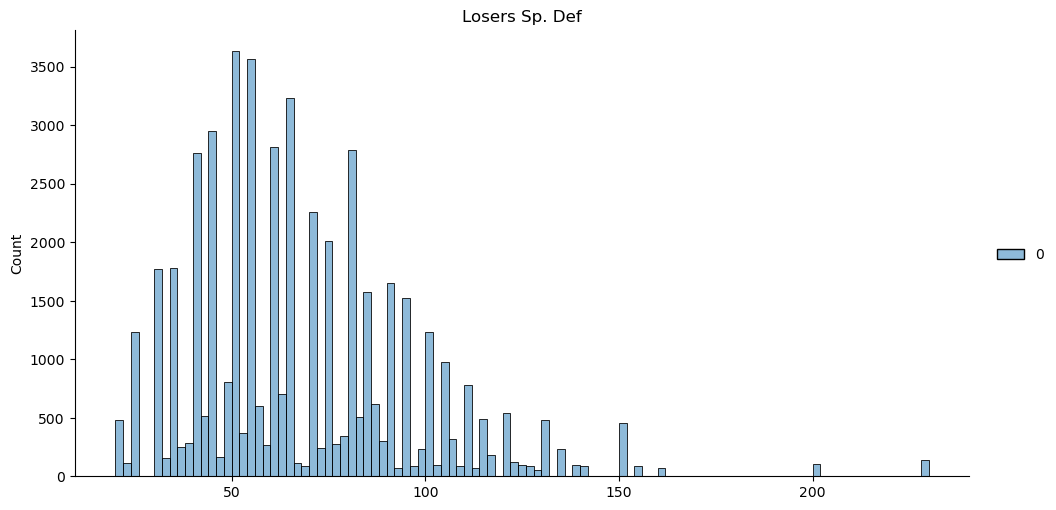

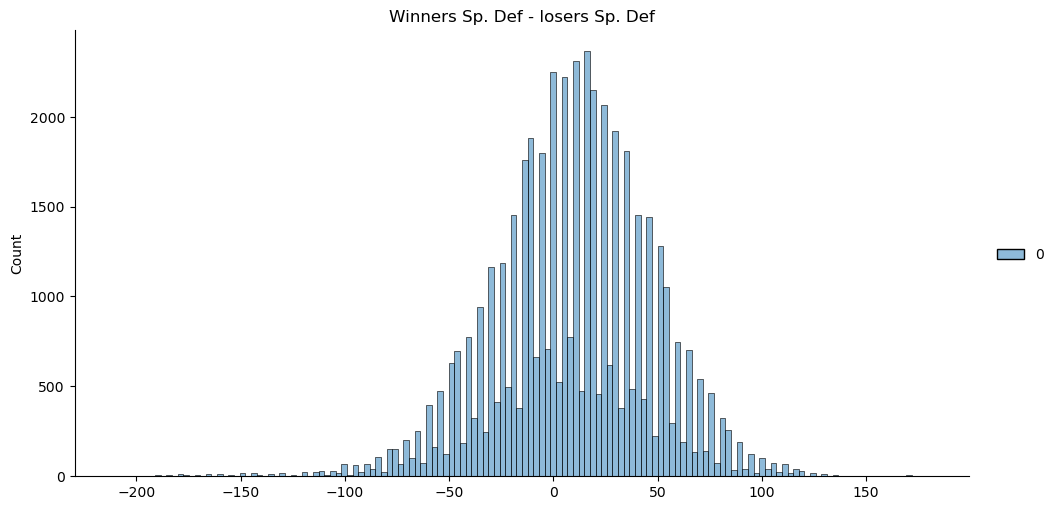

Average winners Sp. Def - losers Sp. Def :  0    8.61526
dtype: float64


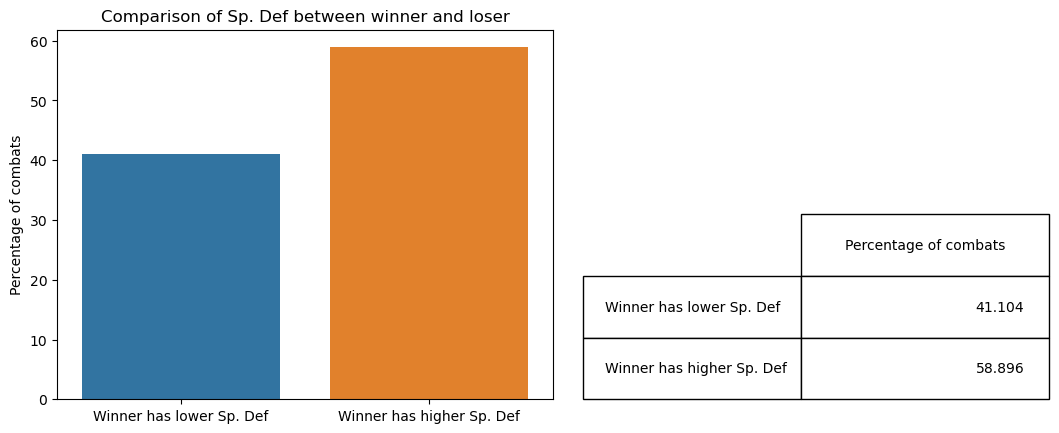


-----------------------------------------------------------------------------------------------------------------------------------------------


 Speed  :




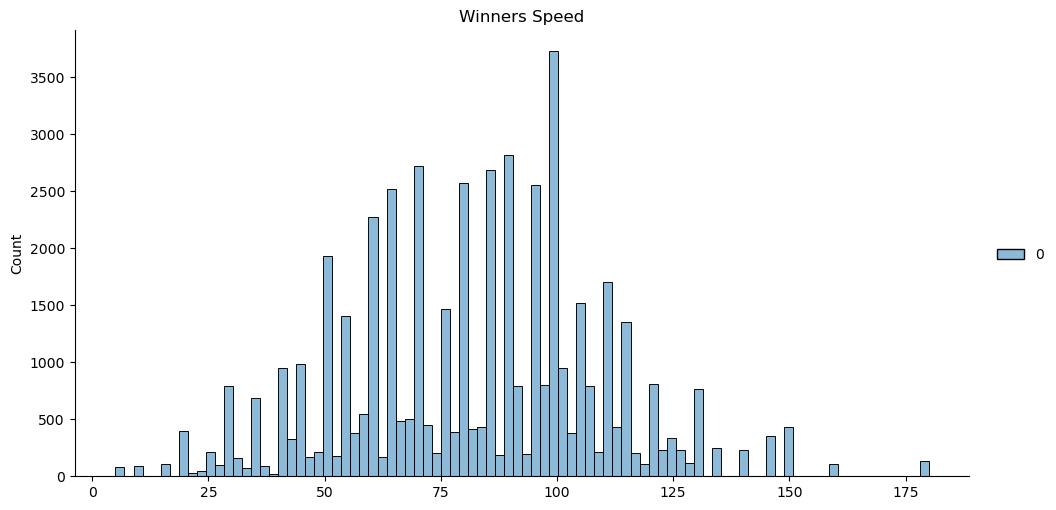

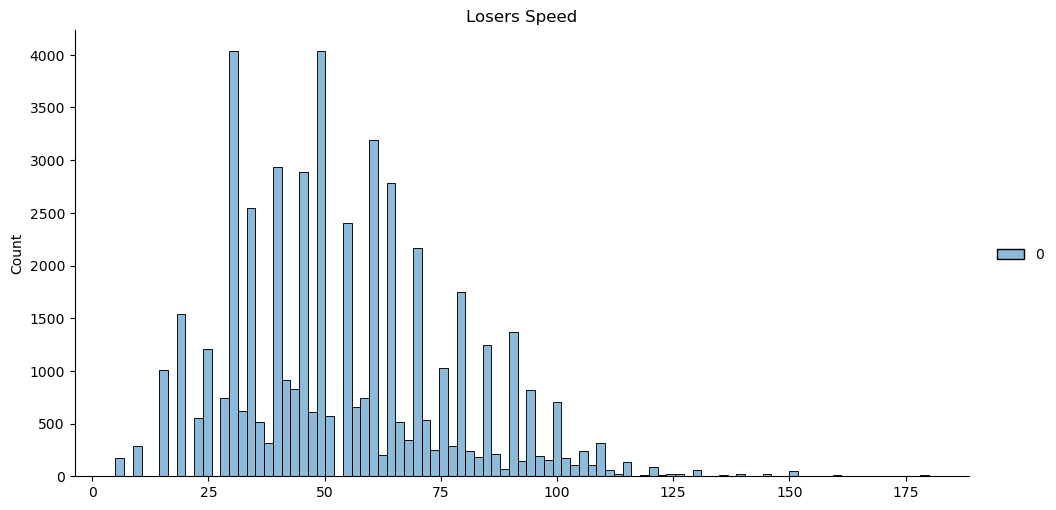

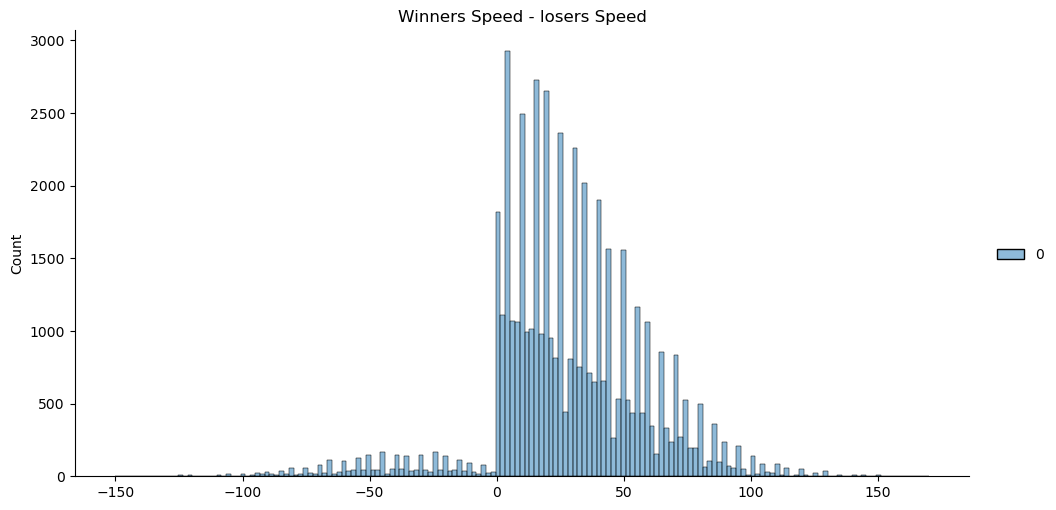

Average winners Speed - losers Speed :  0    27.97688
dtype: float64


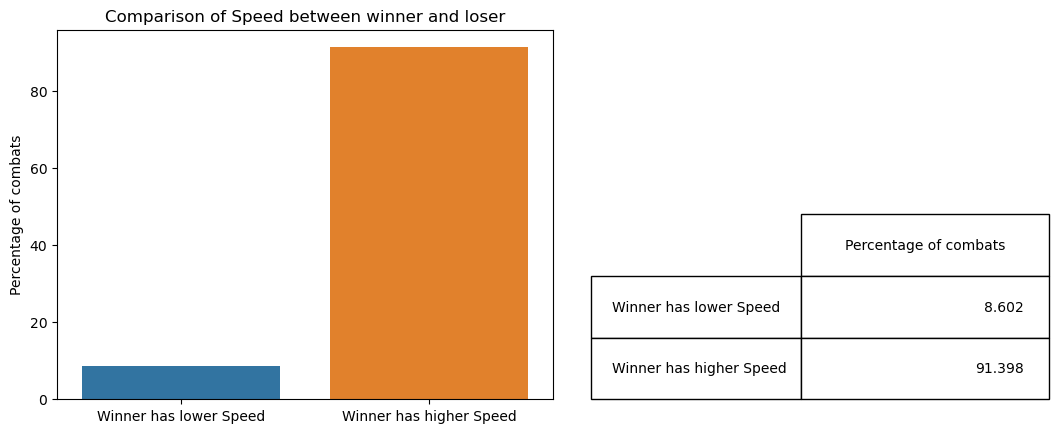


-----------------------------------------------------------------------------------------------------------------------------------------------



In [7]:
# Function to plot the difference between individual stats of winners and losers  
def statDiffBtwWinnerAndLoser(stat : str):
    print('\n',stat, " :\n\n")
    winnerStatsSeries = [[] for i in range(len(combats.index))]
    losersStatsSeries = [[] for i in range(len(combats.index))]
    for i in range(len(combats.index)):
        if combats.iat[i, 2] == 0: # Winner is first pokemon
            winnerStatsSeries[i].append(pokemon.at[combats.iat[i, 0] - 1, stat]) # Stats of first pokemon are appended
            losersStatsSeries[i].append(pokemon.at[combats.iat[i, 1] - 1, stat])
        else:
            winnerStatsSeries[i].append(pokemon.at[combats.iat[i, 1] - 1, stat])
            losersStatsSeries[i].append(pokemon.at[combats.iat[i, 0] - 1, stat])
    
    
    statDiffSeries = [[] for i in range(len(combats.index))]
    for i in range(len(combats.index)):
        statDiffSeries[i].append(winnerStatsSeries[i][0] - losersStatsSeries[i][0])
    
    winnerStatsSeries = pd.DataFrame(winnerStatsSeries)
    sns.displot(data=winnerStatsSeries, aspect= 2)
    plt.title("Winners " + stat)
    plt.show()
    
    losersStatsSeries = pd.DataFrame(losersStatsSeries)
    sns.displot(data=losersStatsSeries, aspect = 2, color='red')
    plt.title("Losers " + stat)
    plt.show()
    
    
        
    statDiffSeries = pd.DataFrame(statDiffSeries)
    statComparison = (statDiffSeries > 0).value_counts()

    sns.displot(data=statDiffSeries, aspect=2)
    plt.title("Winners " + stat + " - losers " + stat)
    plt.show()
    
    print("Average winners " + stat + " - losers " + stat + " : ", statDiffSeries.mean())
    
    sns.barplot(x = ["Winner has lower " + stat, "Winner has higher " + stat], y = statComparison.sort_index().values/ statComparison.sum() *100)
    plt.ylabel("Percentage of combats")
    plt.title("Comparison of " + stat +" between winner and loser")
    plt.table(cellText= (statComparison.sort_index().values/ statComparison.sum() *100).reshape(2,1), colLabels=["Percentage of combats"], rowLabels=["Winner has lower " + stat, "Winner has higher " + stat],bbox = [1.5, 0, 0.5, 0.5])
    plt.show()
    print('\n-----------------------------------------------------------------------------------------------------------------------------------------------\n')

statsColumns = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
for stat in statsColumns:
    statDiffBtwWinnerAndLoser(stat)   



In [8]:
#creating Dictonaries for type and stats
#Type Dict will have type 1 and type 2 while stats will have the rest of the stats data

type_dic = pokemon.iloc[:,0:4]
type_dic=type_dic.drop("Name", axis=1)

stats_dic = pokemon.drop(['Name','Type 1','Type 2','Generation','Legendary'],axis=1)

type_dict = type_dic.set_index('id').T.to_dict('list')
stats_dict = stats_dic.set_index('id').T.to_dict('list')


In [9]:
#creating a replace function that will map the type and stats of first and second pokemon in their respective Dictionaries
def replace(data):
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats']= data.Second_pokemon.map(stats_dict)
    
    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)
    
    
    return data

In [10]:
#stats_diff function will get the difference in stats of the first and the second pokemon and give us a dataframe consisting of those differences
def stats_diff(data):
        stats_col=["HP_diff","Attack_diff","Defense_diff",'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff','Max_Attack_Ratio_1','Max_Attack_Ratio_2']
        diff_list=[[] for i in range(len(data.index))]
        i = 0
        for row in data.itertuples():

            diff_list[i].append(row.First_pokemon_stats[0] - row.Second_pokemon_stats[0])
            
            
           
            diff_list[i].append(row.First_pokemon_stats[1] - row.Second_pokemon_stats[1])
            
            diff_list[i].append(row.First_pokemon_stats[2] - row.Second_pokemon_stats[2])

            diff_list[i].append(row.First_pokemon_stats[3] - row.Second_pokemon_stats[3]) 
            
            diff_list[i].append(row.First_pokemon_stats[4] - row.Second_pokemon_stats[4])

            diff_list[i].append(row.First_pokemon_stats[5] - row.Second_pokemon_stats[5])      
           
            phatk_ratio_1 = row.First_pokemon_stats[1] / row.Second_pokemon_stats[2]
            phatk_ratio_2 = row.Second_pokemon_stats[1] / row.First_pokemon_stats[2]
            spatk_ratio_1 = row.First_pokemon_stats[3] / row.Second_pokemon_stats[4]
            spatk_ratio_2 = row.Second_pokemon_stats[3] / row.First_pokemon_stats[4]
            diff_list[i].append(max(phatk_ratio_1,spatk_ratio_1) * 2)
            diff_list[i].append(max(phatk_ratio_2,spatk_ratio_2))

            i = i + 1
            
        stats_df = pd.DataFrame(diff_list, columns=stats_col)
        data = pd.concat([data, stats_df], axis=1)
        data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)
        
        return data

In [11]:
# Dictionaries having effectiveness of different types of pokemon on each other.
#created 4 lists based on the types and their effectiveness on each other 
# the values in the lists starts with 1, if type is found in the very_effective dictionary then the value is multiplied by 2
#if value found in not_very_effective then value is divided by 2

def effectiveness(data):
    
    
    very_effective_dict = {'Normal': [],
                           'Fighting': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fighting', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fighting', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fighting', 'Dragon', 'Dark'],
                           'None': []}
    not_very_effective_dict = {'Normal': ['Rock', 'Steel','Ghost'],
                               'Fighting': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy','Ghost'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost','Steel'],
                               'Ground': ['Bug', 'Grass','Flying'],
                               'Rock': ['Fighting', 'Ground', 'Steel'],
                               'Bug': ['Fighting', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon','Ground'],
                               'Psychic': ['Steel', 'Psychic','Dark'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel','Fairy'],
                               'Dark': ['Fighting', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}
    

        
    p1_type1=[]
    p1_type2=[]
    p2_type1=[]
    p2_type2=[]
    
    
    for row in data.itertuples():
        nested_type =[[1,1], [1,1]]
        for i in range (0,2):
            for j in range (0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *=2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /=2
                
                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *=2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /=2
                
                
        p1_type1.append(nested_type[0][0])
        p1_type2.append(nested_type[0][1])
        p2_type1.append(nested_type[1][0])
        p2_type2.append(nested_type[1][1])
        
    data = data.assign(P1_type = max(p1_type1,p1_type2),P2_type = max(p2_type1,p2_type2))
        
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [12]:
train_df = replace(combats)
print(train_df.head(5))

       First_pokemon    Second_pokemon  Winner         First_pokemon_stats  \
0     [Rock, Ground]     [Grass, Dark]       1    [50, 64, 50, 45, 50, 41]   
1  [Grass, Fighting]  [Rock, Fighting]       1  [91, 90, 72, 90, 129, 108]   
2    [Fairy, Flying]   [Psychic, None]       1   [55, 40, 85, 80, 105, 40]   
3       [Fire, None]    [Dragon, None]       1    [40, 40, 40, 70, 40, 20]   
4      [Rock, Water]       [Bug, Rock]       0  [70, 60, 125, 115, 70, 55]   

         Second_pokemon_stats  
0    [70, 70, 40, 60, 40, 60]  
1  [91, 129, 90, 72, 90, 108]  
2   [75, 75, 75, 125, 95, 40]  
3   [77, 120, 90, 60, 90, 48]  
4   [20, 10, 230, 10, 230, 5]  


In [13]:
# Calling stats_diff function
train_df = stats_diff(train_df)
print(train_df.head(5))

       First_pokemon    Second_pokemon  Winner  HP_diff  Attack_diff  \
0     [Rock, Ground]     [Grass, Dark]       1      -20           -6   
1  [Grass, Fighting]  [Rock, Fighting]       1        0          -39   
2    [Fairy, Flying]   [Psychic, None]       1      -20          -35   
3       [Fire, None]    [Dragon, None]       1      -37          -80   
4      [Rock, Water]       [Bug, Rock]       0       50           50   

   Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  Max_Attack_Ratio_1  \
0            10          -15           10         -19            3.200000   
1           -18           18           39           0            2.000000   
2            10          -45           10           0            1.684211   
3           -50           10          -50         -28            1.555556   
4          -105          105         -160          50            1.000000   

   Max_Attack_Ratio_2  
0            1.400000  
1            1.791667  
2            1.190476  
3       

In [14]:
# Calling effectiveness function 
train_df = effectiveness(train_df)
print(train_df.head(5))

   Winner  HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  \
0       1      -20           -6            10          -15           10   
1       1        0          -39           -18           18           39   
2       1      -20          -35            10          -45           10   
3       1      -37          -80           -50           10          -50   
4       0       50           50          -105          105         -160   

   Speed_diff  Max_Attack_Ratio_1  Max_Attack_Ratio_2  P1_type  P2_type  
0         -19            3.200000            1.400000      1.0      4.0  
1           0            2.000000            1.791667      2.0      0.5  
2           0            1.684211            1.190476      1.0      1.0  
3         -28            1.555556            3.000000      0.5      1.0  
4          50            1.000000            0.142857      2.0      1.0  


In [15]:
# Seperating data points into features and class labels
y = train_df['Winner']
X = train_df.drop('Winner', axis=1)

# Increasing or Decreasing Attack, Special Attack and Max Attack depending on type advantage
X.loc[X['P1_type'] > X['P2_type'], 'Attack_diff'] = X['Attack_diff'] * X['Max_Attack_Ratio_1']
X.loc[X['P1_type'] > X['P2_type'], 'Sp.Atk_diff'] = X['Sp.Atk_diff'] * X['Max_Attack_Ratio_1']

X.loc[X['P1_type'] < X['P2_type'], 'Attack_diff'] = X['Attack_diff'] / X['Max_Attack_Ratio_2']
X.loc[X['P1_type'] < X['P2_type'], 'Sp.Atk_diff'] = X['Sp.Atk_diff'] / X['Max_Attack_Ratio_2']

X.loc[X['P1_type'] > X['P2_type'], 'Max_Attack_Ratio_1'] = X['Max_Attack_Ratio_1'] * X['P1_type']
X.loc[X['P1_type'] < X['P2_type'], 'Max_Attack_Ratio_2'] = X['Max_Attack_Ratio_2'] * X['P2_type']

print(X.head(10))

   HP_diff  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  \
0      -20    -4.285714            10   -10.714286           10         -19   
1        0   -78.000000           -18    36.000000           39           0   
2      -20   -35.000000            10   -45.000000           10           0   
3      -37   -26.666667           -50     3.333333          -50         -28   
4       50    50.000000          -105   105.000000         -160          50   
5      -10    -3.000000          -100     7.000000         -100           5   
6      -25     0.000000            10   -17.608696          -50         -25   
7      -80    -7.000000           -70   -22.750000          -85         -55   
8        0    12.000000            28   -23.000000          -28         -29   
9        5   -13.636364           -10     2.727273          -20          -5   

   Max_Attack_Ratio_1  Max_Attack_Ratio_2  P1_type  P2_type  
0            3.200000            5.600000     1.00      4.0  
1     

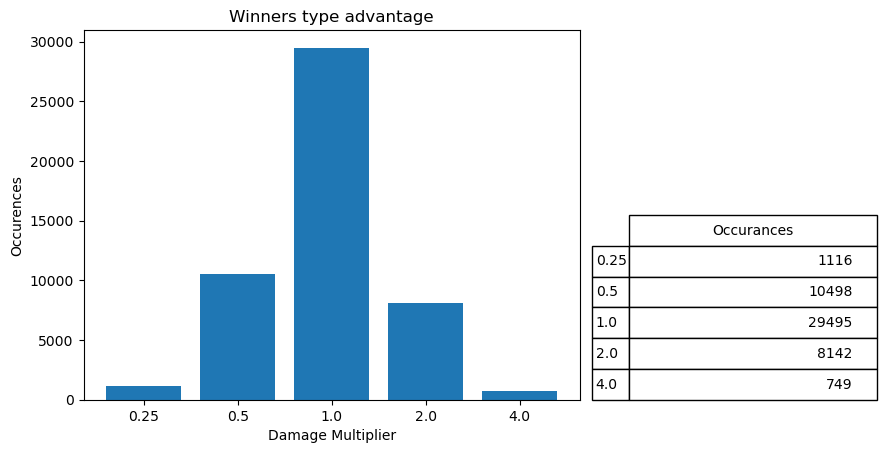

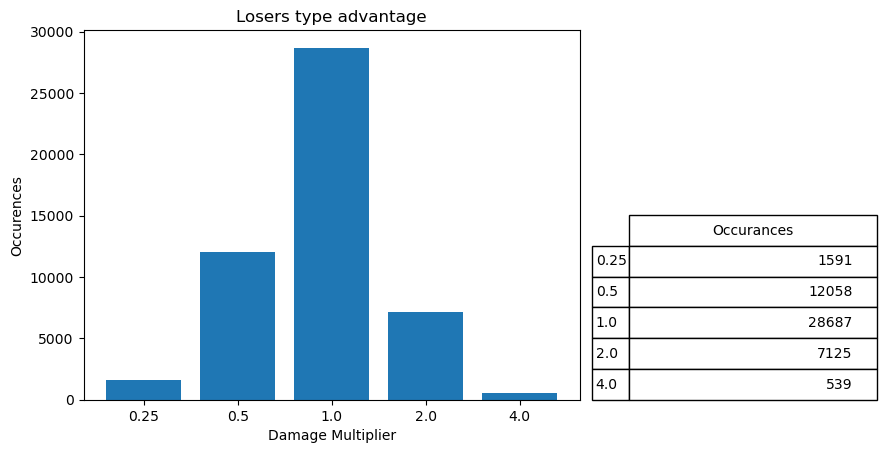

In [16]:
# Plotting Type Advantages of Winner and Loser
winnersDamageMultiplier = {}
for i in range(len(train_df.index)):
    if train_df.iat[i,0] == 0:
        if train_df.iat[i,9] in winnersDamageMultiplier:
            winnersDamageMultiplier[train_df.iat[i,9]] += 1
        else:
            winnersDamageMultiplier[train_df.iat[i,9]] = 1
    else:
        if train_df.iat[i,10] in winnersDamageMultiplier:
            winnersDamageMultiplier[train_df.iat[i,10]] += 1
        else:
            winnersDamageMultiplier[train_df.iat[i,10]] = 1

winnersDamageMultiplierl = list(winnersDamageMultiplier.keys())
winnersDamageMultiplierl.sort()
winnersDamageMultiplier = {i: winnersDamageMultiplier[i] for i in winnersDamageMultiplierl}
plt.bar(range(len(winnersDamageMultiplier)), list(winnersDamageMultiplier.values()), align='center')
lis = list(winnersDamageMultiplier.values()) 
a = np.array(lis).reshape(5,1)
plt.table(cellText=a, colLabels=["Occurances"], rowLabels=[idx for idx in list(winnersDamageMultiplier.keys())], bbox = [1.1, 0, 0.5, 0.5])
plt.xticks(range(len(winnersDamageMultiplier)), list(winnersDamageMultiplier.keys()))
plt.ylabel("Occurences")
plt.xlabel("Damage Multiplier")
plt.title("Winners type advantage")
plt.show()

losersDamageMultiplier = {}
for i in range(len(train_df.index)):
    if train_df.iat[i,0] == 0:
        if train_df.iat[i,10] in losersDamageMultiplier:
            losersDamageMultiplier[train_df.iat[i,10]] += 1
        else:
            losersDamageMultiplier[train_df.iat[i,10]] = 1
    else:
        if train_df.iat[i,9] in losersDamageMultiplier:
            losersDamageMultiplier[train_df.iat[i,9]] += 1
        else:
            losersDamageMultiplier[train_df.iat[i,9]] = 1

losersDamageMultiplierl = list(losersDamageMultiplier.keys())
losersDamageMultiplierl.sort()
losersDamageMultiplier = {i: losersDamageMultiplier[i] for i in losersDamageMultiplierl}
plt.bar(range(len(losersDamageMultiplier)), list(losersDamageMultiplier.values()), align='center')
lis = list(losersDamageMultiplier.values()) 
a = np.array(lis).reshape(5,1)
plt.table(cellText=a, colLabels=["Occurances"], rowLabels=[idx for idx in list(losersDamageMultiplier.keys())], bbox = [1.1, 0, 0.5, 0.5])
plt.xticks(range(len(losersDamageMultiplier)), list(losersDamageMultiplier.keys()))
plt.ylabel("Occurences")
plt.xlabel("Damage Multiplier")
plt.title("Losers type advantage")
plt.show()

In [17]:
# Creating Train and Test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Parameters for first exhaustive grid search
parameters=[
    {
        'clf': DecisionTreeClassifier(),
        'clf__criterion': ['log_loss'],
        'clf__criterion': ['gini', 'entropy','log_loss'],
        'clf__max_depth': [10, 20, 40],
    },
    {
        'clf': LogisticRegression(),
        'clf__penalty': ['l2'],
        'clf__multi_class': ['ovr', 'multinomial'],
        'clf__C': np.linspace(0.0001, 30, 2),

    },
    {
        'clf': RandomForestClassifier(),
        'clf__criterion': ['gini', 'entropy','log_loss'],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__n_estimators': [300 ,500, 700],
        'clf__max_depth': [10, 20, 40],
    },
    {
        'clf': GaussianNB(),
        'clf__var_smoothing':[0.000000000001, 0.000000001, 0.0000001],
    },
    {   'clf': SVC(),
        'clf__max_iter': [200, 500],
        'clf__C': [0.1, 1, 2, 5, 10, 30, 50],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    {
        'clf': KNeighborsClassifier(),
        'clf__n_neighbors': list(range(3, 49, 2)),
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
]

In [ ]:
# Parameters for second exhaustive grid search
parameters=[
    {
        'clf': DecisionTreeClassifier(),
        'clf__criterion': ['gini', 'entropy','log_loss'],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__max_depth': [3, 5, 10, 15],
    },
    {
        'clf': LogisticRegression(),
        'clf__penalty': ['l2'],
        'clf__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'clf__multi_class': ['ovr', 'multinomial'],
        'clf__C': np.linspace(20, 30, 1),

    },
    {
        'clf': RandomForestClassifier(),
        'clf__criterion': ['gini', 'entropy','log_loss'],
        'clf__max_features': ['sqrt', 'log2', None],
        'clf__n_estimators': [600, 700, 800, 900],
        'clf__max_depth': [5, 7, 10, 20],
    },
    {
        'clf': GaussianNB(),
        'clf__var_smoothing':[0.0000000000000001, 0.00000000000001, 0.000000000001],
    },
    {   'clf': SVC(),
        'clf__max_iter': [200, 500],
        'clf__C': [0.1, 1, 2, 5, 10, 30, 50],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    {
        'clf': KNeighborsClassifier(),
        'clf__n_neighbors': list(range(7, 15, 1)),
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
]

In [ ]:
# Parameters for third grid search with best models
parameters=[
    {
        'clf': DecisionTreeClassifier(),
        'clf__criterion': ['gini','log_loss'],
        'clf__max_features': ['log2', None],
        'clf__max_depth': [3, 5, 8],
    },

    {
        'clf': RandomForestClassifier(),
        'clf__criterion': ['gini', 'entropy','log_loss'],
        'clf__max_features': ['log2'],
        'clf__n_estimators': [500, 600],
        'clf__max_depth': [8, 9, 10],
    },
    {
        'clf': KNeighborsClassifier(),
        'clf__n_neighbors': list(range(10, 16, 1)),
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
]

In [18]:
# Scaling the Data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)

# apply same transformation to test data
X_test1 = scaler.transform(X_test) 

In [ ]:
# Implementing Grid Search
results = []

for model in parameters: 
    clf = model.pop('clf')
    print(f"\nStarted {str(clf)}")
    print("-------------------------------------------")
    pipeline = Pipeline([
    ("select", SelectKBest()),
    ("clf", clf)])
    print("\nStarted GridSearchCV")
    print("-------------------------------------------")
    grid_model = GridSearchCV(pipeline, model, verbose=2, cv=10
                                  , scoring='f1', error_score='raise')
    grid_model.fit(X_train1, y_train)
    print("Done")
    print(f"Training Score: {grid_model.best_score_}")
    print(f"Parameters: {grid_model.best_params_}") 
    print(f"Best Classifier: {grid_model.best_estimator_}")        
    results.append({
            'Model': clf,
            'Best_Score': grid_model.best_score_,
            'Best_Params': grid_model.best_params_
    })

In [ ]:
# Printing results of Grid Search
import pprint
pprint.pprint(results)


In [19]:
# Random Forest
rf = RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'log2',n_estimators = 500)
rf.fit(X_train1, y_train) 
rf_pred = rf.predict(X_test1)
print("--------Random Forest-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, rf_pred))
print('\nClassification Report:\n', classification_report(y_test,rf_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, rf_pred))

--------Random Forest-------

Confusion Matrix:
 [[4552  201]
 [ 298 4949]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4753
           1       0.96      0.94      0.95      5247

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000


Accuracy Score:
 0.9501


[0.01291103 0.06016013 0.01182207 0.04001739 0.01242384 0.80326918
 0.02528804 0.02514342 0.00583674 0.00312816]


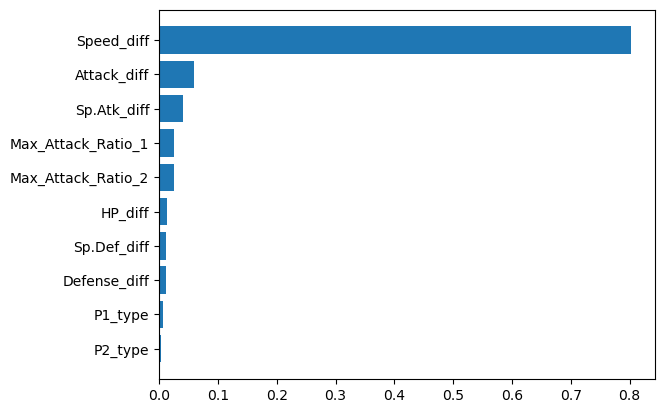

In [20]:
# Plotting importances of each feature
importances = rf.feature_importances_
indices = np.argsort(importances)
print(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [21]:
# Logistic Regression
log_reg = LogisticRegression(C = 30, multi_class = 'ovr', penalty = 'l2')
log_reg.fit(X_train1, y_train)
log_reg_pred = log_reg.predict(X_test1)
print("--------Logistic Regression-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, log_reg_pred))
print('\nClassification Report:\n', classification_report(y_test, log_reg_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, log_reg_pred))

--------Logistic Regression-------

Confusion Matrix:
 [[4136  617]
 [ 504 4743]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4753
           1       0.88      0.90      0.89      5247

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Accuracy Score:
 0.8879


In [22]:
# KNN
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11)
knn.fit(X_train1, y_train)
knn_pred = knn.predict(X_test1)
print("--------KNN-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, knn_pred))
print('\nClassification Report:\n', classification_report(y_test, knn_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, knn_pred))

--------KNN-------

Confusion Matrix:
 [[4317  436]
 [ 479 4768]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      4753
           1       0.92      0.91      0.91      5247

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Accuracy Score:
 0.9085


In [23]:
# Decision Tree
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, max_features = None)
dt.fit(X_train1, y_train)
dt_pred = dt.predict(X_test1)
print("--------Decision Tree-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, dt_pred))
print('\nClassification Report:\n', classification_report(y_test, dt_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, dt_pred))

--------Decision Tree-------

Confusion Matrix:
 [[4536  217]
 [ 354 4893]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4753
           1       0.96      0.93      0.94      5247

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000


Accuracy Score:
 0.9429


[0.00742161 0.01832978 0.00343214 0.00333998 0.00150305 0.93823179
 0.00691289 0.0119336  0.0069897  0.00190545]


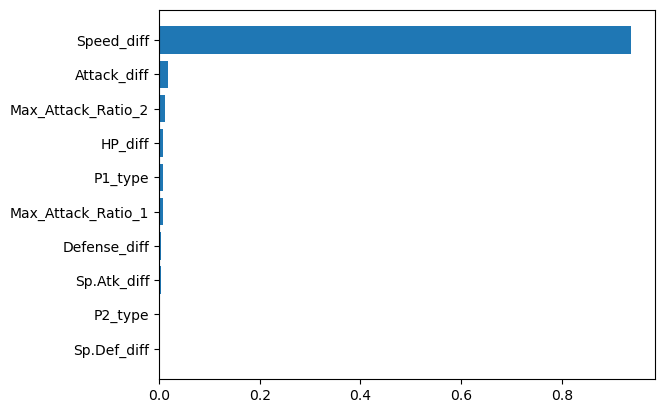

In [24]:
importances = dt.feature_importances_
indices = np.argsort(importances)
print(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [25]:
# SVM
svm = SVC(C = 30, kernel= 'linear', max_iter= 500)
svm.fit(X_train1, y_train)
svm_pred = svm.predict(X_test1)
print("--------SVM-------")
print('\nConfusion Matrix:\n', confusion_matrix(y_test, svm_pred))
print('\nClassification Report:\n', classification_report(y_test, svm_pred))
print('\nAccuracy Score:\n', accuracy_score(y_test, svm_pred))

--------SVM-------

Confusion Matrix:
 [[1041 3712]
 [ 729 4518]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.22      0.32      4753
           1       0.55      0.86      0.67      5247

    accuracy                           0.56     10000
   macro avg       0.57      0.54      0.49     10000
weighted avg       0.57      0.56      0.50     10000


Accuracy Score:
 0.5559


/home/susheel/anaconda3/envs/DSML/lib/python3.11/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [26]:
# Naive Bayes
nb = GaussianNB(var_smoothing= 1e-12)
nb.fit(X_train1, y_train)
nb_pred_wo_tune = nb.predict(X_test1)
print('\nConfusion Matrix:\n', confusion_matrix(y_test, nb_pred_wo_tune))
print('\nClassification Report:\n', classification_report(y_test, nb_pred_wo_tune))
print('\nAccuracy Score:\n', accuracy_score(y_test, nb_pred_wo_tune))


Confusion Matrix:
 [[3391 1362]
 [ 660 4587]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      4753
           1       0.77      0.87      0.82      5247

    accuracy                           0.80     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.80      0.80     10000


Accuracy Score:
 0.7978


In [27]:
prediction_df = test.copy()
test_df = replace(test)
test_df = stats_diff(test_df)
test_df = effectiveness(test_df)

In [28]:
# Use Random Forest model to predict test data
model = rf.fit(X, y)
prediction = rf.predict(test_df)

prediction_df['Winner'] = prediction
prediction_df['Winner'][prediction_df['Winner'] == 0] = prediction_df['First_pokemon']
prediction_df['Winner'][prediction_df['Winner'] == 1] = prediction_df['Second_pokemon']
prediction_df.index += 1
prediction_df.index.name = 'S. No'
prediction_df.drop(columns=['First_pokemon','Second_pokemon'], inplace=True, axis = 1)
prediction_df.to_csv('test_labels.csv')